In [1]:
import geopandas as gpd

<Axes: >

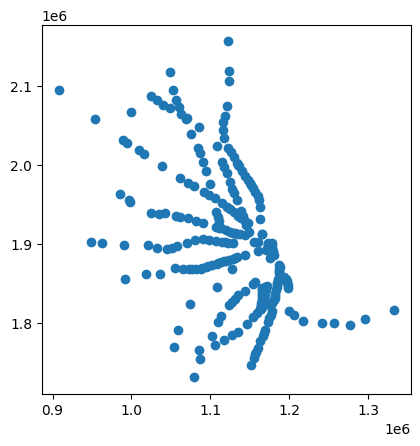

In [2]:
# shapefile = gpd.read_file("../data/MetraStations/MetraStations.shp")

shapefile = gpd.read_file("../data/MetraStations")
shapefile.plot()


In [3]:
shapefile
# shapefile.geometry

,OBJECTID,STATION_ID,ASSET_ID,NAME,LONGNAME,LINES,BRANCH_ID,STATUS,MILEPOST,FAREZONE,...,TICKET_AVA,ADDRESS,MUNICIPALI,TELEPHONE,WEBLINK,LABELANGLE,EDIT_INIT,EDIT_DATE,YEAR_OPEN,geometry
0,1,1091.0,51201091.0,Stony Island,Stony Island,Electric,1,1,9.1,B,...,NaN,71st St. (at Stony Island Ave.),Chicago,NaN,NaN,30,ks,1995-08-02,NaN,MULTIPOINT (1187895.880 1858208.720)
1,2,1097.0,51201097.0,Bryn Mawr,Bryn Mawr,Electric,1,1,9.7,B,...,NaN,71st St. (at Jeffrey Blvd.),Chicago,NaN,NaN,30,ks,1995-08-02,NaN,MULTIPOINT (1190583.720 1858270.340)
2,3,1103.0,51201103.0,South Shore,South Shore,Electric,1,1,10.3,B,...,NaN,71st St. (near Yates and South Shore Dr.),Chicago,NaN,NaN,0,ks,1995-08-02,NaN,MULTIPOINT (1193664.510 1857979.740)
3,4,1109.0,51201109.0,Windsor Park,Windsor Park,Electric,1,1,10.9,B,...,NaN,75th St. (at Exchange Ave.),Chicago,NaN,NaN,0,ks,1995-08-02,NaN,MULTIPOINT (1195346.740 1855540.540)
4,5,1115.0,51201115.0,Cheltenham,Cheltenham (79th Street),Electric,1,1,11.5,B,...,NaN,79th St. (at Exchange Ave.),Chicago,NaN,NaN,0,ks,1995-08-02,NaN,MULTIPOINT (1197216.280 1853302.530)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,243,0.0,0.0,Schiller Park,Schiller Park,NCS,16,1,0.0,C,...,NaN,4555 Ruby St,Schiller Park,NaN,NaN,0,af,2011-04-28,NaN,MULTIPOINT (1110535.780 1929472.843)
243,244,0.0,0.0,Belmont Ave,Belmont Ave,NCS,16,1,0.0,C,...,NaN,9280 Belmont Ave,Franklin Park,NaN,NaN,0,af,2011-04-28,NaN,MULTIPOINT (1112953.148 1920556.671)
244,245,0.0,0.0,Grand-Cicero,Grand-Cicero,Milw-W,12,1,0.0,B,...,NaN,1833 N Cicero Ave,Chicago,NaN,NaN,0,af,2011-04-28,NaN,MULTIPOINT (1143963.328 1911956.415)
245,246,0.0,0.0,Laraway Road,New Lenox Laraway Road,SWS,8,1,0.0,H,...,NaN,1861 Village Station Blvd,New Lenox,NaN,NaN,0,af,2011-04-28,NaN,MULTIPOINT (1086569.901 1754482.540)
